## EDA

In [2]:
import pandas as pd
import numpy as np

In [4]:
house_df=pd.read_csv("bangalore house price prediction OHE-data.csv")

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [8]:
house_df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [12]:
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
os.makedirs("house_graphs")

In [24]:
def save_graph(fig, name):
    fig.savefig(f"graphs/{name}.png")

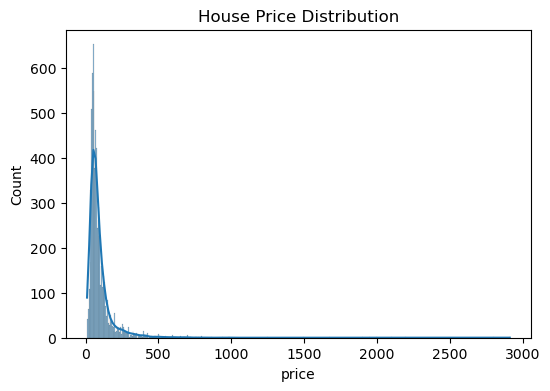

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(house_df['price'],kde=True)
plt.title("House Price Distribution")
save_graph(plt,"house_price_distribution")

#### Model Creation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [36]:
X=house_df.drop(columns=['price'])
y=house_df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [41]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

In [43]:
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Linear Regression R^2:{r2:.4f},RMSE:{rmse:.2f}")

Linear Regression R^2:0.9197,RMSE:30.20


In [45]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [47]:
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred_poly=poly_reg.predict(X_test_poly)

In [49]:
r2_poly=r2_score(y_test,y_pred_poly)
rmse_poly=np.sqrt(mean_squared_error(y_test,y_pred_poly))
print(f"Polynomial Regression R^2:{r2_poly:.4f},RMSE:{rmse_poly:.2f}")

Polynomial Regression R^2:0.9933,RMSE:8.70


In [55]:
results = pd.DataFrame({"Model":["Linear Regression","Polynomial Regression"],
                         "R^2 Score":[r2, r2_poly],
                         "RMSE":[rmse, rmse_poly]})
results.to_csv("house_model_results.csv",index=False)

In [59]:
zipf=zipfile.ZipFile("plots_house.zip","w",zipfile.ZIP_DEFLATED)
with zipfile.ZipFile("house_graphs.zip","w") as zipf:
    for file in os.listdir("house_graphs"):
        zipf.write(os.path.join("house_graphs",file))

zipf.close()

In [63]:
house_df.to_csv("houseprice_prj6_cleaned.csv", index=False)